In [1]:
import cv2
import matplotlib.pyplot as plt
from copy import deepcopy

In [3]:
img_BGR = cv2.imread("./original_rgb.png")
img_RGB = cv2.cvtColor(img_BGR, cv2.COLOR_BGR2RGB)
img_GRAY = cv2.cvtColor(img_BGR, cv2.COLOR_BGR2GRAY)

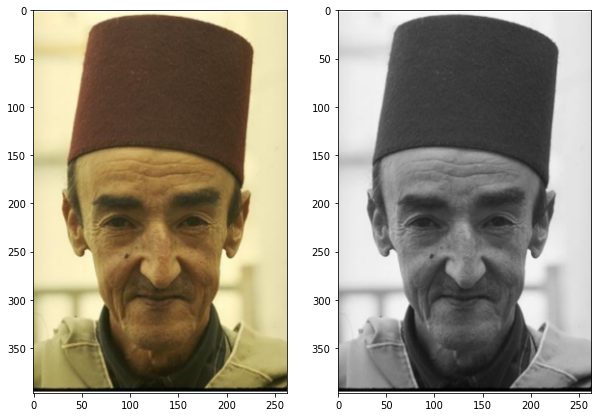

In [4]:
_, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 10))
ax = ax.flatten()
ax[0].imshow(img_RGB)
ax[1].imshow(img_GRAY, cmap="gray")

In [9]:
# Noise Reduction Using Median Filter
# cutoff frequency decreases with the increase in the size of the kernel, large kernel means the sharpness (edges) of the image is lost
blurred = cv2.medianBlur(img_GRAY, 5)
# Edge Detection Using Laplacian Filter
laplacian = cv2.Laplacian(blurred,ddepth=cv2.CV_8U, ksize=5)#, ksize=5, ddepth=-1

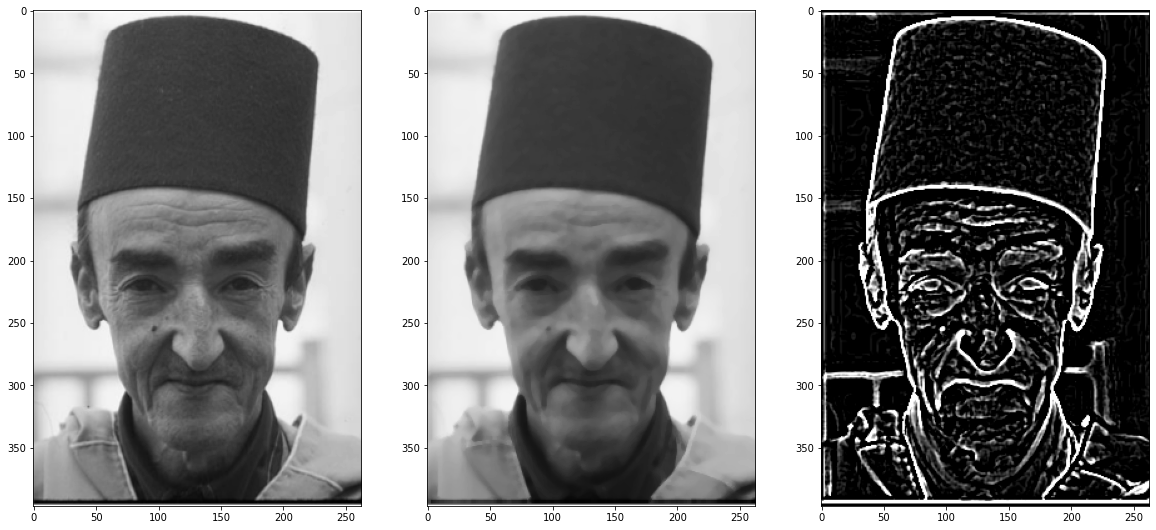

In [10]:
_, ax = plt.subplots(nrows=1, ncols=3, figsize=(20, 20))
ax = ax.flatten()
ax[0].imshow(img_GRAY, cmap="gray")
ax[1].imshow(blurred, cmap="gray")
ax[2].imshow(laplacian, cmap="gray")

In [17]:
# Apply binary threshold on the detected edges
_,binary_threshold = cv2.threshold(laplacian, thresh=150, maxval=255, type=cv2.THRESH_BINARY)
adaptive_threshold = cv2.adaptiveThreshold(blurred, maxValue=255, adaptiveMethod=cv2.ADAPTIVE_THRESH_MEAN_C, thresholdType=cv2.THRESH_BINARY_INV, blockSize=3,C=3)

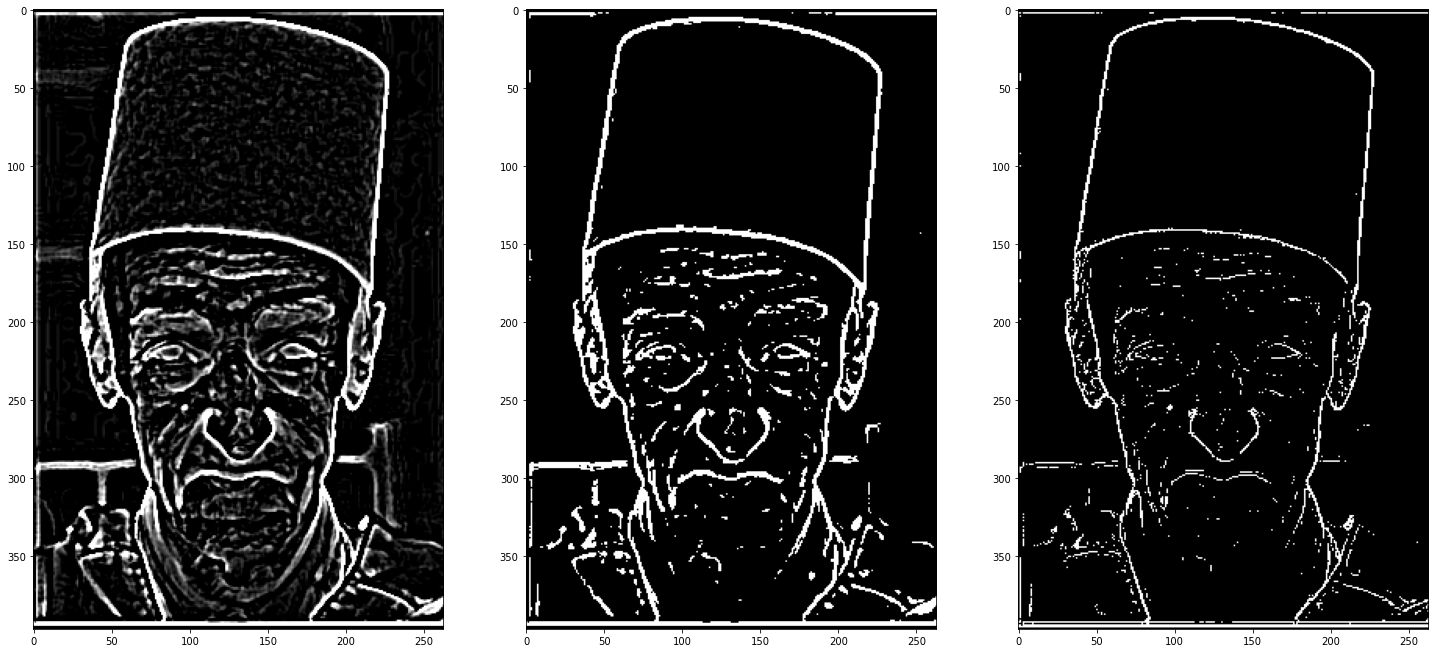

In [18]:
_, ax = plt.subplots(nrows=1, ncols=3, figsize=(25, 25))
ax = ax.flatten()
ax[0].imshow(laplacian, cmap="gray")
ax[1].imshow(binary_threshold, cmap="gray")
ax[2].imshow(adaptive_threshold, cmap="gray")

In [19]:
# sigmaSpace -> spatial extent of the kernel, size of the considered neighborhood.
# sigmaColor -> “minimum” amplitude of an edge
numBilateral = 10
bilateral = cv2.bilateralFilter(img_RGB, d=9, sigmaColor=9, sigmaSpace=7)
for _ in range(numBilateral):
    bilateral = cv2.bilateralFilter(bilateral, d=9, sigmaColor=9, sigmaSpace=7)

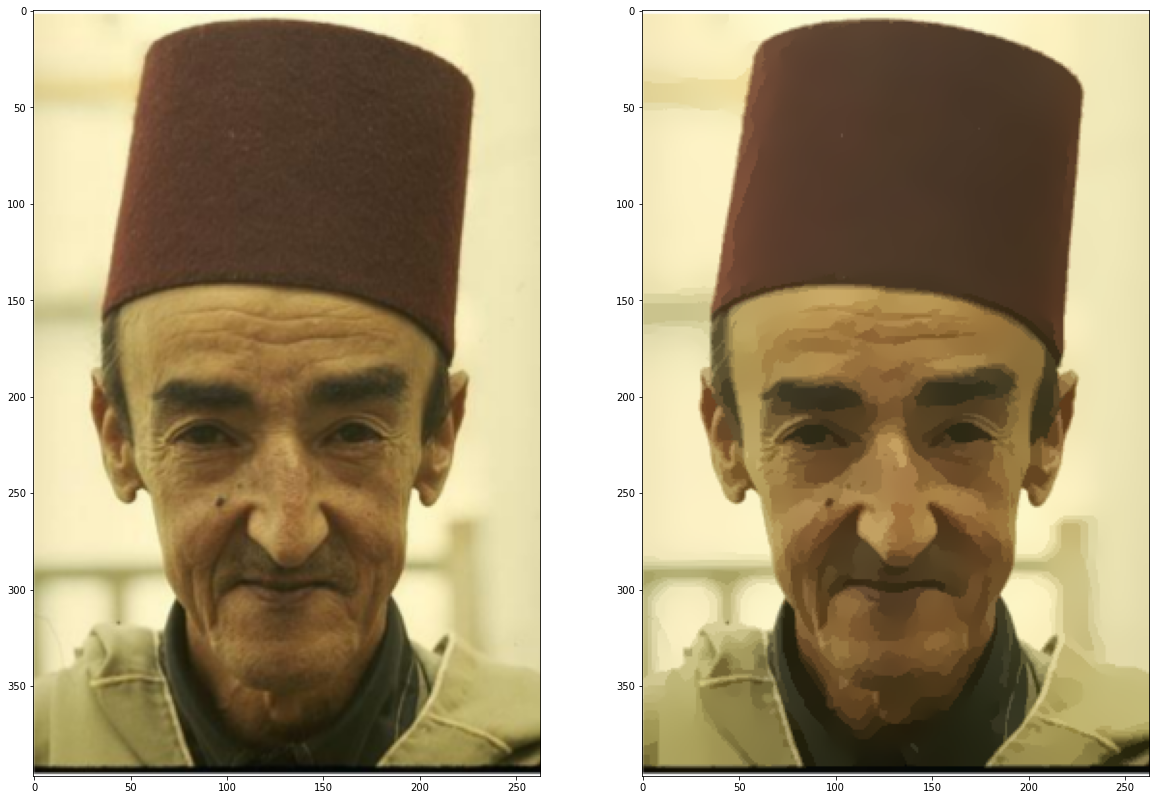

In [20]:
_, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 20))
ax = ax.flatten()
ax[0].imshow(img_RGB)
ax[1].imshow(bilateral)

In [23]:
cartoon = deepcopy(bilateral)
cartoon[binary_threshold==255] = (0,0,0)

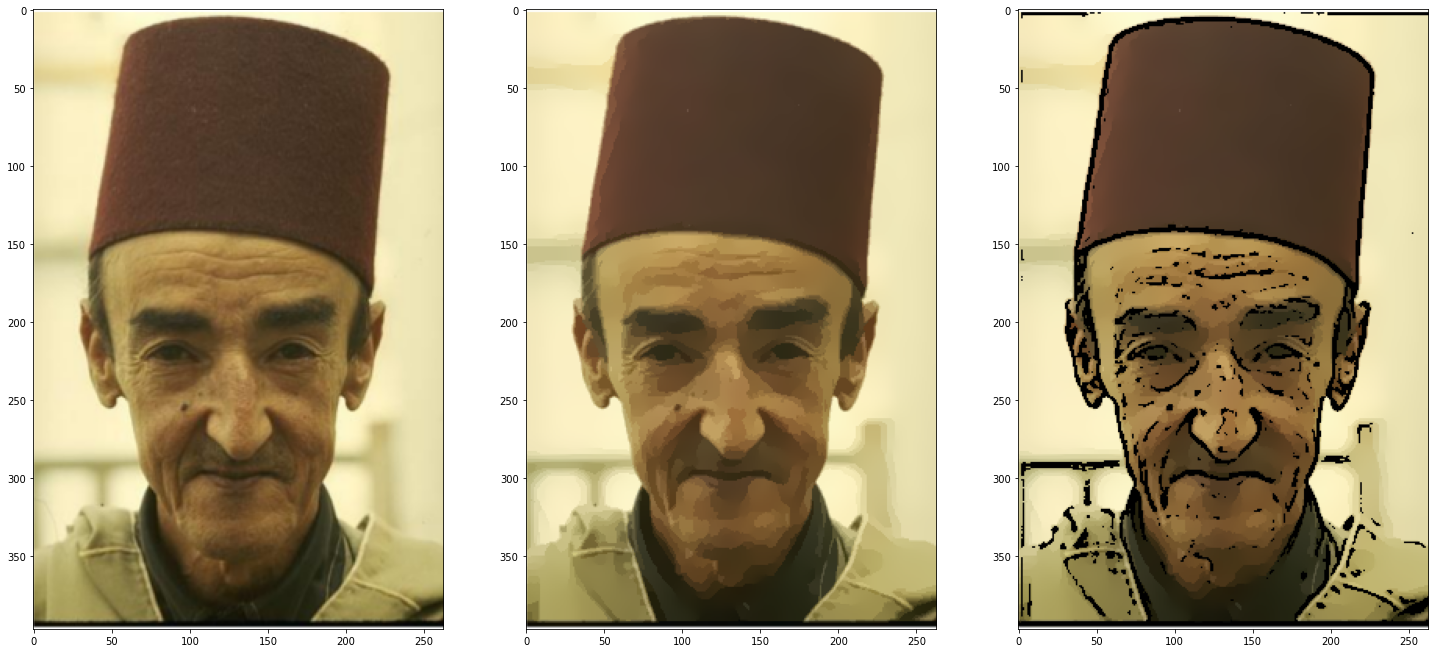

In [24]:
_, ax = plt.subplots(nrows=1, ncols=3, figsize=(25, 25))
ax = ax.flatten()
ax[0].imshow(img_RGB)
ax[1].imshow(bilateral)
ax[2].imshow(cartoon)